In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.
df=pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
x=df.drop('sales',axis=1)

In [5]:
y=df['sales']

In [6]:
#Polynomial Regression
#From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [8]:
poly_features=polynomial_converter.fit_transform(x)

In [9]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
poly_features.shape

(200, 9)

In [11]:
x.shape

(200, 3)

In [12]:
x.iloc[1]

TV           44.5
radio        39.3
newspaper    45.1
Name: 1, dtype: float64

In [13]:
poly_features[2]

array([  17.2 ,   45.9 ,   69.3 ,  295.84,  789.48, 1191.96, 2106.81,
       3180.87, 4802.49])

In [14]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [15]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [16]:
230.1*37.8

8697.779999999999

In [17]:
#Train | Test Split
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [19]:
#Model for fitting on Polynomial Data
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression(fit_intercept=True)

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
#evaluation on the test set
test_predictions=model.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [25]:
MAE

0.48967980448035886

In [26]:
MSE

0.44175055104033895

In [27]:
RMSE

0.6646431757269

In [28]:
df['sales'].mean()

14.0225

In [29]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

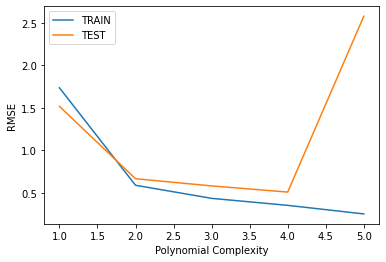

In [30]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

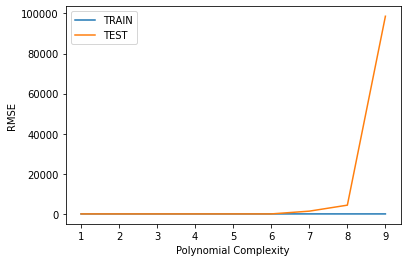

In [31]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

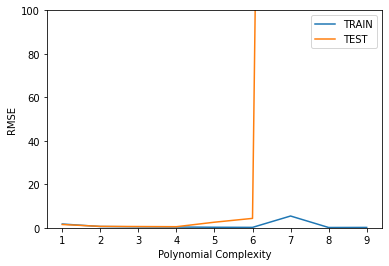

In [32]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [33]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [34]:
final_model = LinearRegression()

In [35]:
final_model.fit(final_poly_converter.fit_transform(x),y)

LinearRegression()

In [36]:
from joblib import dump, load

In [37]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [38]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [39]:
#predictions on new data
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [40]:
campaign = [[149,22,12]]

In [41]:
campaign_poly = loaded_poly.transform(campaign)

C:\Users\ecs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [42]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [43]:
final_model.predict(campaign_poly)

array([14.64501014])